<a href="https://colab.research.google.com/github/sanketpadwal/GCDAI_INSAID_JAN20/blob/main/Algorithms/KNN/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Failure Clinical Records Data Set**
### *KNN Algorithm and Grid Search CV*

<center><img src="https://github.com/sanketpadwal/GCDAI_INSAID_JAN20/blob/main/Algorithms/KNN/Snap215.jpg?raw=true" width="1000" height="400" /></center>
*image source - https: //newatlas.com/medical/novel-ai-system-proves-100-accurate-at-detecting-heart-failure-from-a-single-heartbeat/*

## Problem Statement
Predict the probability of the heart failure instances based on age, gender, pre-existing health conditions, habbits and blood sample readings.

## Objective
 - Explore K-NearestNeighbour algorithm
 - Validate hyperparameters with Grid Search Cross Validation 

## About this dataset
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.
Most cardiovascular diseases can be prevented by addressing behavioral risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.
People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.
*data source - https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

**Attribute Information:**

Thirteen (13) clinical features:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean) 0 - no; 1 - yes
- high blood pressure: if the patient has hypertension (boolean) 0 - no; 1 - yes
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L) 
- diabetes: if the patient has diabetes (boolean) 0 - no; 1 - yes
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary) 0 - female; 1 - male
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean) 0 - no; 1 - yes
- time: follow-up period (days)
- [target] death event: if the patient deceased during the follow-up period (boolean) 0 - survived; 1 - died

Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("Paired")
import warnings
from collections import Counter
warnings.filterwarnings('ignore')  #this will ignore the warnings.it wont display warnings in notebook
%matplotlib inline

Import Data

https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

In [2]:
# data source
url = "https://raw.githubusercontent.com/sanketpadwal/GCDAI_INSAID_JAN20/main/Algorithms/KNN/heart_failure_clinical_records_dataset.csv?_sm_au_=iVVVMQrf2qNS4F41L321jK0f1JH33"

In [3]:
#load data and preview
data = pd.read_csv(url,sep=',')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# size of data
data.shape

(299, 13)

In [5]:
# data columns
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
# Changing data types to 'int'
data['age']=data['age'].astype('int64') # Changing age to int years
data['platelets']=data['platelets'].astype('int64') # Changing platelates to int for better representation

In [8]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,263358.026756,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [9]:
# find null values
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [10]:
# unique values
data.nunique()

age                          46
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [11]:
# # Experiment Dictionery
# d ={}



In [12]:
## Function to guesstimate outliers in column 
def get_outlier_columns(data):
    fix_col = []
    for EachColumn in data.columns:
        df = data[EachColumn].ravel()
        min = np.min(df)
        Q5 = np.percentile(df,5)
        Q25 = np.percentile(df,25)
        Q50 = np.percentile(df,50)
        Q75 = np.percentile(df,75)
        Q95 = np.percentile(df,95)
        max = np.max(df)
        var = np.var(df)
        sd = np.std(df)
        AverageUnit = (var+sd)/2
        minDiff = Q25 - min
        maxDiff = max - Q75
        if (minDiff > AverageUnit) | (maxDiff > AverageUnit):
            fix_col.append(EachColumn)
    return fix_col

In [13]:
# find outlier columns by calculations
get_outlier_columns(data)

['serum_creatinine', 'serum_sodium']

In [14]:
# # log of columns
# data['serum_creatinine'] = np.log(data['serum_creatinine'])
# data['serum_sodium'] = np.log(data['serum_sodium'])
# data['creatinine_phosphokinase'] = np.log(data['creatinine_phosphokinase'])
# data['platelets'] = np.log(data['platelets']) 

In [15]:
# # replace values in categorical columns using map function dataframe to make it more meaning full
# data['DEATH_EVENT'] = data['DEATH_EVENT'].map({0:'survived',1:'died'})

# # replace values in categorical columns using replace-dictionary function dataframe to make it more meaning full
# data['smoking'] = data['smoking'].replace({0:'no',1:'yes'})

# # replace values in categorical columns using apply function dataframe to make it more meaning full
# data['high_blood_pressure'] = data['high_blood_pressure'].apply(lambda x: {0:'no',1:'yes'}.get(x,x))

# # replace values in categorical columns using transform function dataframe to make it more meaning full
# data.loc[:,['diabetes','anaemia']] = data.loc[:,['diabetes','anaemia']].transform(lambda x: x.map(lambda x: {0:'no',1:'yes'}.get(x,x)))

# # replace values in categorical columns using replace - list function dataframe to make it more meaning full
# data['sex'] = data['sex'].replace([0,1],['female','male'])

In [16]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000,2.7,116,0,0,8,1


'DEATH_EVENT', 'smoking', 'sex', 'high_blood_pressure', 'diabetes', 'anaemia'

In [17]:
# Spot check
a = data['serum_creatinine']
print(np.min(a))
print(np.percentile(a,5))
print(np.percentile(a,25))
print(np.percentile(a,50))
print(np.percentile(a,75))
print(np.percentile(a,95))
print(np.max(a))
print(np.var(a))
print(np.std(a))
print((np.var(a)+np.std(a))/2)
print(np.percentile(a,25) - np.min(a))
print(np.max(a) - np.percentile(a,75))

0.5
0.7
0.9
1.1
1.4
3.0
9.4
1.066631771456693
1.0327786652795907
1.049705218368142
0.4
8.0


In [18]:
# check for data skewness - prefered normal range for skewness -1 to 1
data.skew()

age                         0.424172
anaemia                     0.278261
creatinine_phosphokinase    4.463110
diabetes                    0.333929
ejection_fraction           0.555383
high_blood_pressure         0.626732
platelets                   1.462321
serum_creatinine            4.455996
serum_sodium               -1.048136
sex                        -0.626732
smoking                     0.770349
time                        0.127803
DEATH_EVENT                 0.770349
dtype: float64

In [19]:
# check for data kurtosis - prefered normal range for kurtosis -5 to 5
data.kurt()

age                         -0.184406
anaemia                     -1.935563
creatinine_phosphokinase    25.149046
diabetes                    -1.901254
ejection_fraction            0.041409
high_blood_pressure         -1.618076
platelets                    6.209255
serum_creatinine            25.828239
serum_sodium                 4.119712
sex                         -1.618076
smoking                     -1.416080
time                        -1.212048
DEATH_EVENT                 -1.416080
dtype: float64

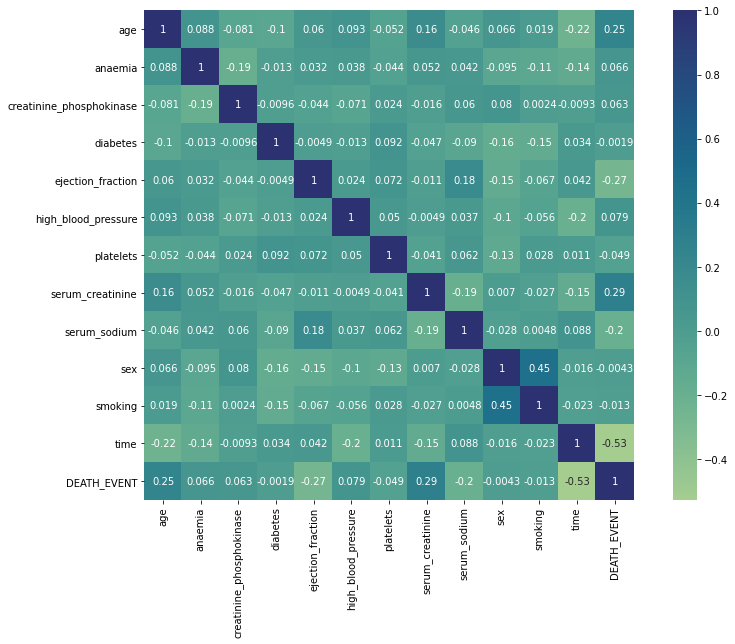

In [20]:
# Correlation heatmap
fig = plt.figure(figsize = (14,9))
sns.heatmap(data.corr(),square = True,annot = True,cmap='crest')
plt.show()

In [21]:
# !pip install -q pandas-profiling

In [22]:
# # Pandas Profiling 
# from pandas_profiling import ProfileReport
# profile = ProfileReport(data, title="Pandas Profiling Report")
# profile.to_file("your_report.html")

In [23]:
# class count
data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

Death events as pie chart:


Text(0, 0.5, '')

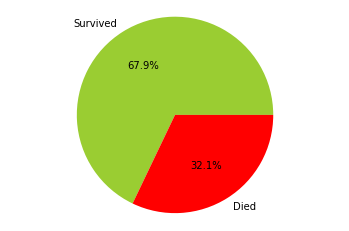

In [24]:
# plot class
print("Death events as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(data.DEATH_EVENT.value_counts(),autopct='%1.1f%%', labels=['Survived','Died'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

In [25]:
data['serum_creatinine_binned'] = pd.cut(data['serum_creatinine'], [0,1.2,5,10], labels=['normal', 'impaired', 'severe'])

In [26]:
data['serum_sodium_binned'] = pd.cut(data['serum_sodium'], [0,135,145,200], labels=['hyponatremia','normal','hypernatremia'])

In [27]:
data['creatinine_phosphokinase_binned'] = pd.cut(data['creatinine_phosphokinase'], [0,198,10000], labels=['normal','critical'])

In [28]:
data['platelets_binned'] = pd.cut(data['platelets'], [0,150000,450000,1000000], labels=['thrombocytopenia','normal','thrombocytosis'])

In [29]:
data = data.drop(['serum_creatinine', 'serum_sodium','creatinine_phosphokinase','platelets'],axis=1)

In [30]:
data.head()

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,sex,smoking,time,DEATH_EVENT,serum_creatinine_binned,serum_sodium_binned,creatinine_phosphokinase_binned,platelets_binned
0,75,0,0,20,1,1,0,4,1,impaired,hyponatremia,critical,normal
1,55,0,0,38,0,1,0,6,1,normal,normal,critical,normal
2,65,0,0,20,0,1,1,7,1,impaired,hyponatremia,normal,normal
3,50,1,0,20,0,1,0,7,1,impaired,normal,normal,normal
4,65,1,1,20,0,0,0,8,1,impaired,hyponatremia,normal,normal


In [31]:
cat_col = ['DEATH_EVENT', 'smoking', 'sex', 'high_blood_pressure', 'diabetes', 'anaemia','platelets_binned','serum_creatinine_binned','serum_sodium_binned','creatinine_phosphokinase_binned']
num_col = ['age','ejection_fraction','time']

 0 - No, 1 - Yes


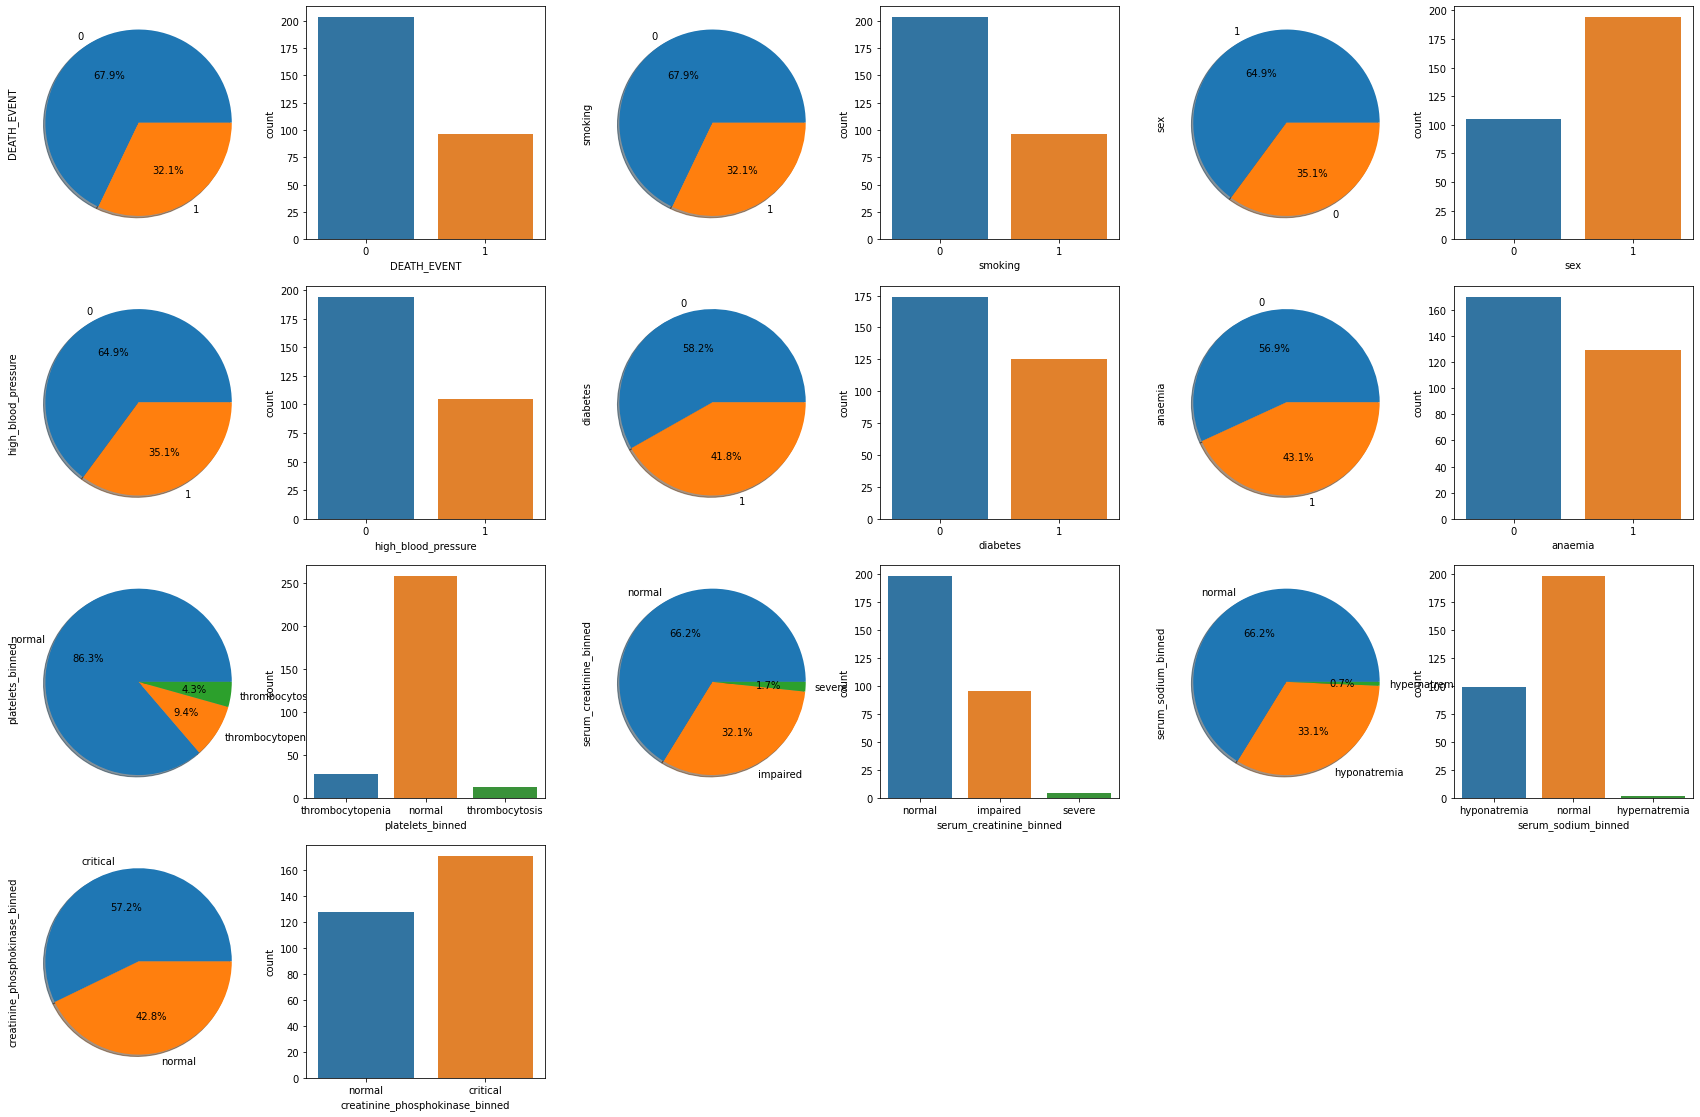

In [32]:
#Categorical Data
plt.figure(figsize=(30, 30))
count = 1

print(" 0 - No, 1 - Yes")
for cols in cat_col:
    plt.subplot(6, 6, count)
    data[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%')
    count+=1
    plt.subplot(6, 6, count)
    sns.countplot(cols, data=data)
    count+=1

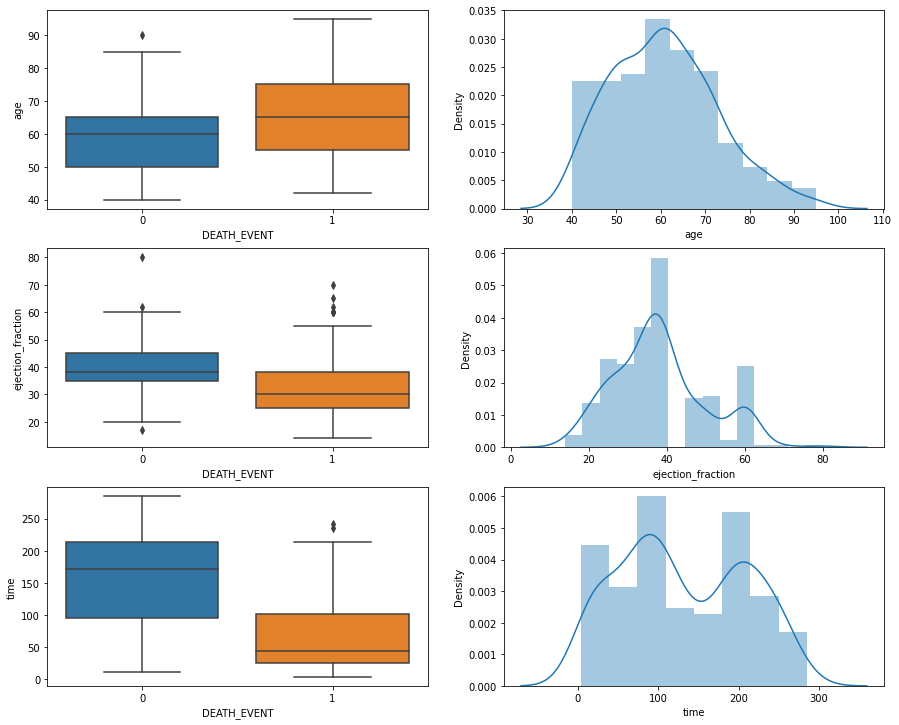

In [33]:
#Numerical Data
plt.figure(figsize=(15, 30))
count = 1
for cols in num_col:
    plt.subplot(7, 2, count)
    sns.boxplot(x='DEATH_EVENT', y= cols, data= data)
    count +=1
    plt.subplot(7, 2, count)
    sns.distplot(data.loc[data[cols].notna(), cols])
    count+=1

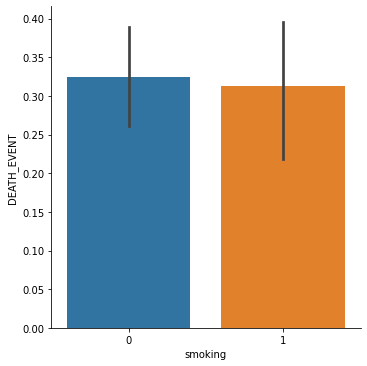

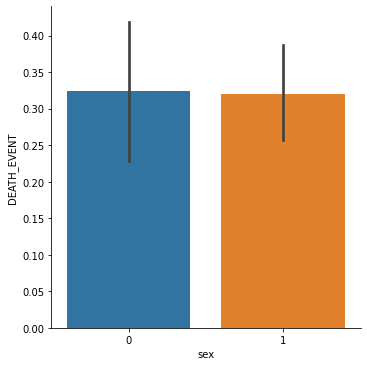

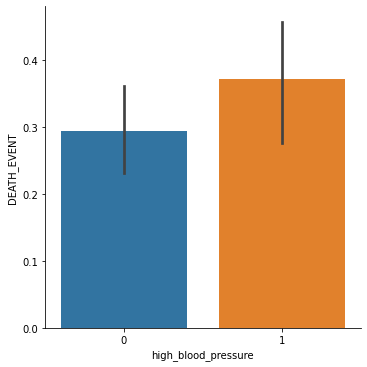

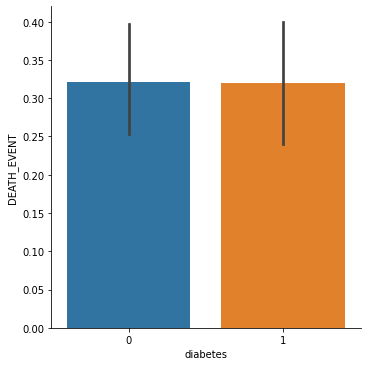

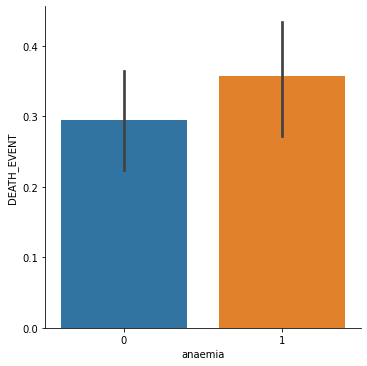

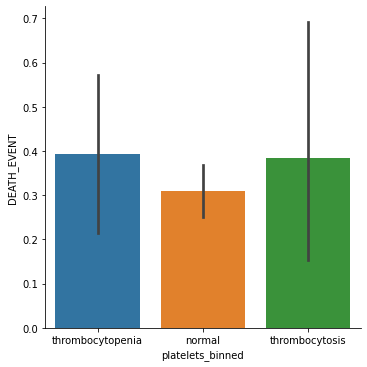

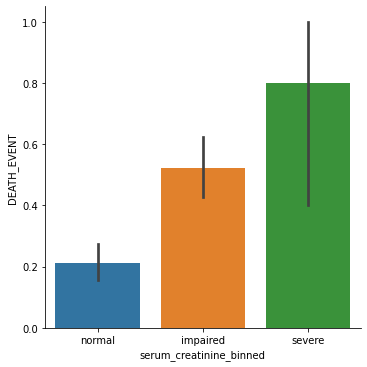

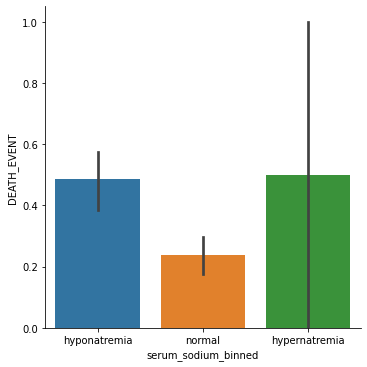

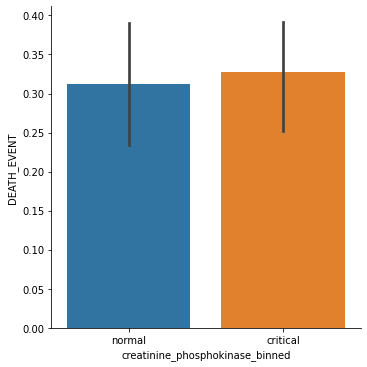

In [34]:
#Categorical Variables : Catplot

for cols in cat_col:
    if cols!='DEATH_EVENT':
        sns.catplot(x=cols, y='DEATH_EVENT',data=data,kind='bar')


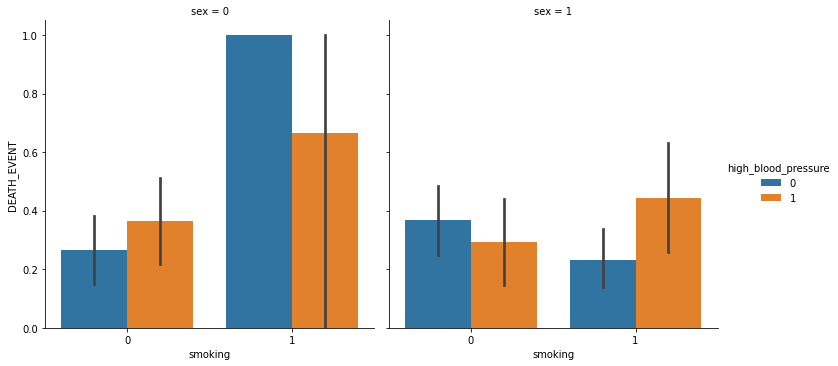

In [35]:
#Catplot impact of smoking on DEATH_EVENT with variables sex & high_blood_pressure
sns.catplot(x='smoking',y='DEATH_EVENT',kind='bar',data=data,col='sex',hue='high_blood_pressure')

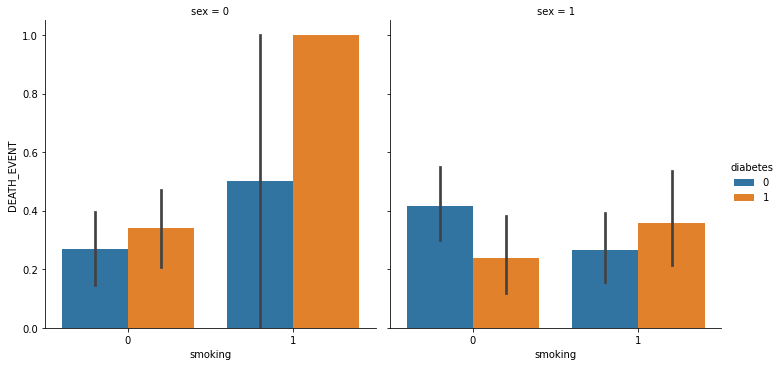

In [36]:
#Catplot impact of smoking on DEATH_EVENT with variables sex & diabetes
sns.catplot(x='smoking',y='DEATH_EVENT',kind='bar',data=data,col='sex',hue='diabetes')

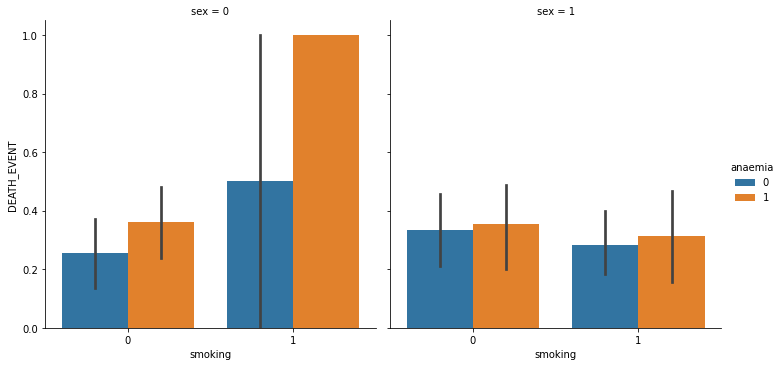

In [37]:
#Catplot impact of smoking on DEATH_EVENT with variables sex & anaemia
sns.catplot(x='smoking',y='DEATH_EVENT',kind='bar',data=data,col='sex',hue='anaemia')

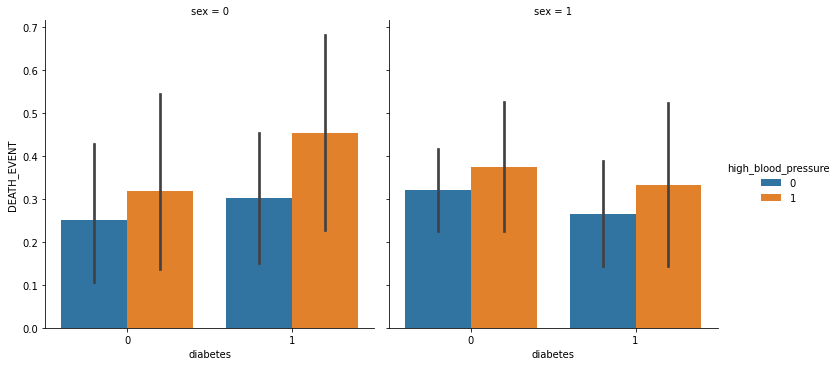

In [38]:
#Catplot impact of diabetes on DEATH_EVENT with variables sex & high_blood_pressure
sns.catplot(x='diabetes',y='DEATH_EVENT',kind='bar',data=data,col='sex',hue='high_blood_pressure')

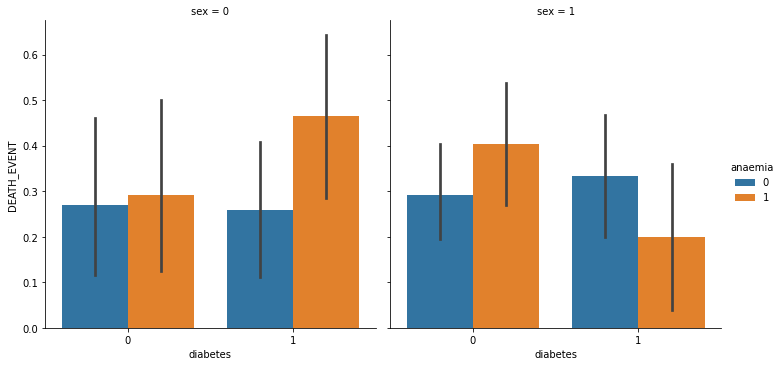

In [39]:
#Catplot impact of diabetes on DEATH_EVENT with variables sex & anaemia
sns.catplot(x='diabetes',y='DEATH_EVENT',kind='bar',data=data,col='sex',hue='anaemia')

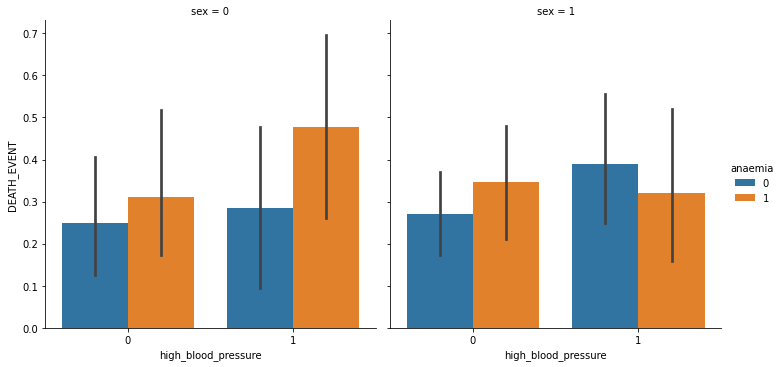

In [40]:
#Catplot impact of high_blood_pressure on DEATH_EVENT with variables sex & anaemia
sns.catplot(x='high_blood_pressure',y='DEATH_EVENT',kind='bar',data=data,col='sex',hue='anaemia')

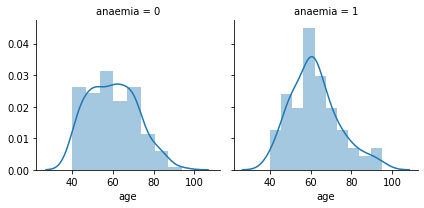

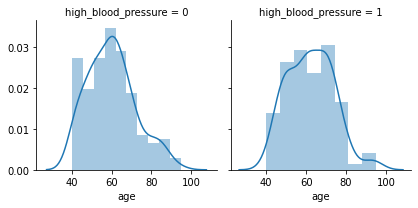

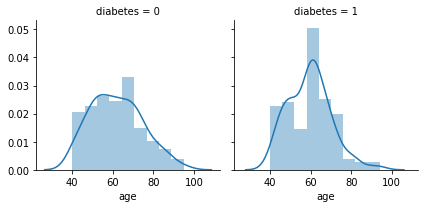

In [41]:
d_cat = ['anaemia','high_blood_pressure','diabetes']

for cols in d_cat:
    g = sns.FacetGrid(data, col=cols)
    g = g.map(sns.distplot, "age")

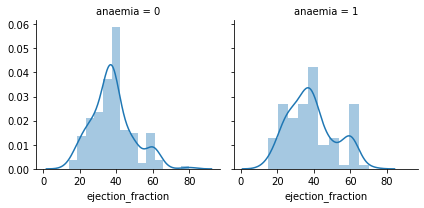

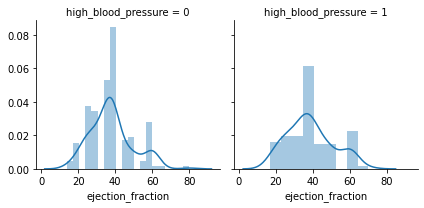

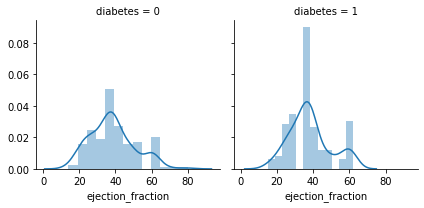

In [42]:
d_cat = ['anaemia','high_blood_pressure','diabetes']

for cols in d_cat:
    g = sns.FacetGrid(data, col=cols)
    g = g.map(sns.distplot, "ejection_fraction")

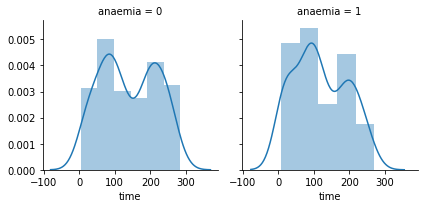

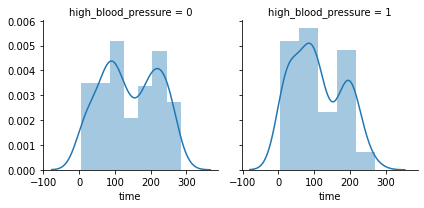

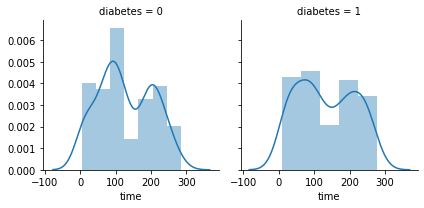

In [43]:
d_cat = ['anaemia','high_blood_pressure','diabetes']

for cols in d_cat:
    g = sns.FacetGrid(data, col=cols)
    g = g.map(sns.distplot, "time")

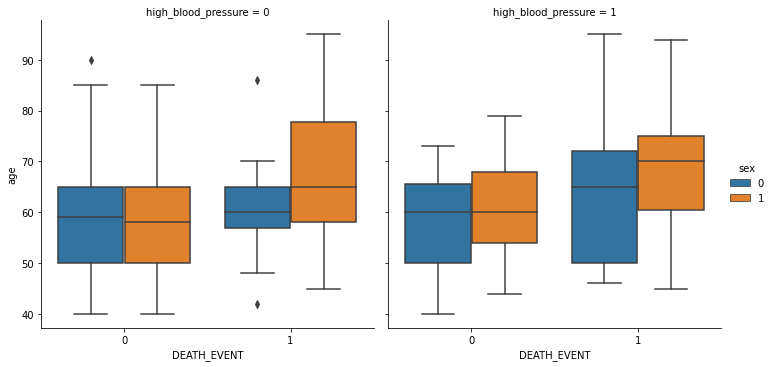

In [44]:
sns.catplot(x='DEATH_EVENT',y='age',data=data,kind='box',hue='sex', col='high_blood_pressure')

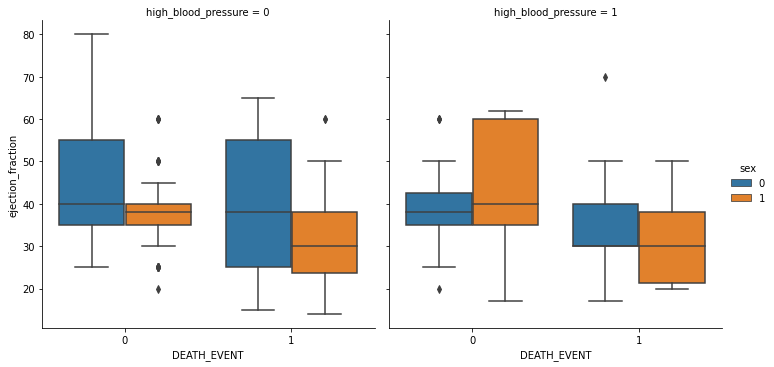

In [45]:
sns.catplot(x='DEATH_EVENT',y='ejection_fraction',data=data,kind='box',hue='sex', col='high_blood_pressure')

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#extracting numeric columns from datset
df1 = data[num_col].copy()

sc.fit(df1)                                                                                   # fit the data to Standardscaler

df1_scale = sc.transform(df1)                                                               # transform the data

print('After standardizing our features, the first 5 rows of our data now look like this:\n')   # print the first 5 value after standardization 

df = pd.DataFrame(data=df1_scale[:,:],columns=num_col)
df.head()

After standardizing our features, the first 5 rows of our data now look like this:



,age,ejection_fraction,time
0,1.193302,-1.530560,-1.629502
1,-0.490896,-0.007077,-1.603691
2,0.351203,-1.530560,-1.590785
3,-0.911945,-1.530560,-1.590785
4,0.351203,-1.530560,-1.577879


In [68]:
# Extract Target variable
label = data.pop('DEATH_EVENT')

In [76]:
# Get dummies categorical variables
df2 = pd.get_dummies(data,drop_first=True)
df2

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,sex,smoking,time,serum_creatinine_binned_impaired,serum_creatinine_binned_severe,serum_sodium_binned_normal,serum_sodium_binned_hypernatremia,creatinine_phosphokinase_binned_critical,platelets_binned_normal,platelets_binned_thrombocytosis
0,75,0,0,20,1,1,0,4,1,0,0,0,1,1,0
1,55,0,0,38,0,1,0,6,0,0,1,0,1,1,0
2,65,0,0,20,0,1,1,7,1,0,0,0,0,1,0
3,50,1,0,20,0,1,0,7,1,0,1,0,0,1,0
4,65,1,1,20,0,0,0,8,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,0,1,38,1,1,1,270,0,0,1,0,0,1,0
295,55,0,0,38,0,0,0,271,0,0,1,0,1,1,0
296,45,0,1,60,0,0,0,278,0,0,1,0,1,0,1
297,45,0,0,38,0,1,1,280,1,0,1,0,1,0,0


In [77]:
data_scale = pd.concat([df2,df],axis=1)
data_scale

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,sex,smoking,time,serum_creatinine_binned_impaired,serum_creatinine_binned_severe,serum_sodium_binned_normal,serum_sodium_binned_hypernatremia,creatinine_phosphokinase_binned_critical,platelets_binned_normal,platelets_binned_thrombocytosis,age,ejection_fraction,time
0,75,0,0,20,1,1,0,4,1,0,0,0,1,1,0,1.193302,-1.530560,-1.629502
1,55,0,0,38,0,1,0,6,0,0,1,0,1,1,0,-0.490896,-0.007077,-1.603691
2,65,0,0,20,0,1,1,7,1,0,0,0,0,1,0,0.351203,-1.530560,-1.590785
3,50,1,0,20,0,1,0,7,1,0,1,0,0,1,0,-0.911945,-1.530560,-1.590785
4,65,1,1,20,0,0,0,8,1,0,0,0,0,1,0,0.351203,-1.530560,-1.577879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,0,1,38,1,1,1,270,0,0,1,0,0,1,0,0.098573,-0.007077,1.803451
295,55,0,0,38,0,0,0,271,0,0,1,0,1,1,0,-0.490896,-0.007077,1.816357
296,45,0,1,60,0,0,0,278,0,0,1,0,1,0,1,-1.332995,1.854958,1.906697
297,45,0,0,38,0,1,1,280,1,0,1,0,1,0,0,-1.332995,-0.007077,1.932509


In [78]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(data_scale, label, test_size = 0.2, random_state = 42)

In [79]:
# Model Import 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a list 
models = [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier()]

In [80]:
# Solution for Second 
print ("This is base model experiementation to decide benchmark models saved in Dictionary ")
accuracy_dict = {}
for eachModel in models:
  model = eachModel
  model.fit(data_train, label_train)
  pred = model.predict(data_test)
  accuracy = accuracy_score(pred,label_test)
  print (accuracy)
  accuracy_dict[type(model).__name__] = accuracy

print (accuracy_dict)

This is base model experiementation to decide benchmark models saved in Dictionary 
0.7833333333333333
0.8
0.7666666666666667
{'LogisticRegression': 0.7833333333333333, 'DecisionTreeClassifier': 0.8, 'KNeighborsClassifier': 0.7666666666666667}


In [81]:
pd.DataFrame(accuracy_dict,index=[0]).T

,0
LogisticRegression,0.783333
DecisionTreeClassifier,0.800000
KNeighborsClassifier,0.766667


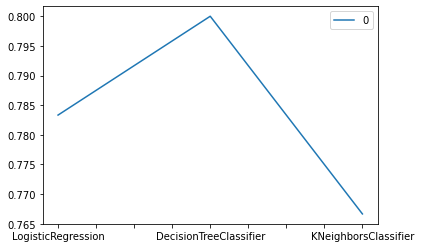

In [82]:
pd.DataFrame(accuracy_dict,index=[0]).T.plot()

In [136]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,p=2)

In [137]:
knn.fit(data_train,label_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [138]:
y_pred = knn.predict(data_test)

In [139]:
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(label_test,y_pred)
print('Accuracy score for the KNN model:', knn_accuracy)

Accuracy score for the KNN model: 0.7666666666666667


In [147]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

k_range = list(range(1,100))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(data_train,label_train)


print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.8786231884057971
{'n_neighbors': 8, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='distance')
CPU times: user 10.4 s, sys: 18.1 ms, total: 10.4 s
Wall time: 10.5 s


--------------------------------------------------------------------------------
**Production Reference**

In [140]:
# model.fit(data_train, label_train)
# pred = model.predict(data_test)
# accuracy = accuracy_score(pred,label_test)

In [141]:
# pd.DataFrame(data_test).to_csv('new_data.csv')

In [142]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=3,p=2)
# knn.fit(data_train,label_train)

In [143]:
# import pickle
# filename = 'KNN_3N_30122020.pickle'
# pickle.dump(knn,open(filename,mode='wb'))